In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns',999)

In [2]:
df = pd.read_csv("data/online_retail_II.csv")
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [5]:
df.describe(include='O')

,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,47635,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350,5829,5918,1350,981330


In [6]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [9]:
df["Invoice"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [11]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$")==False)&(df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

In [12]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1062295,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
1062715,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
1064829,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
1066369,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


# Data Cleaning

In [13]:
cleaned_df = df.copy()

In [14]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$")==True
)

cleaned_df = cleaned_df[mask]
cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [15]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$")==True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True)
    | (cleaned_df["StockCode"].str.match("^PAD$")==True)
)

cleaned_df = cleaned_df[mask]
cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [16]:
cleaned_df.dropna(subset=["Customer ID"],inplace=True)

/tmp/ipykernel_2860/3042227786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"],inplace=True)


In [17]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,802693.00,802693.00,802693.00
mean,13.34,2.93,15338.08
std,144.54,4.28,1693.93
min,1.00,0.00,12346.00
25%,2.00,1.25,13988.00
50%,5.00,1.95,15276.00
75%,12.00,3.75,16809.00
max,80995.00,649.50,18287.00


In [18]:
cleaned_df[cleaned_df["Price"]==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
...,...,...,...,...,...,...,...,...
979924,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.00,13081.00,United Kingdom
979925,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,2011-11-10 11:49:00,0.00,13081.00,United Kingdom
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.00,15602.00,United Kingdom
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.00,12444.00,Norway


In [19]:
cleaned_df = cleaned_df[cleaned_df["Price"]>0]

In [20]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,802632.00,802632.00,802632.00
mean,13.32,2.93,15338.17
std,143.87,4.28,1693.91
min,1.00,0.03,12346.00
25%,2.00,1.25,13988.00
50%,5.00,1.95,15276.00
75%,12.00,3.75,16809.00
max,80995.00,649.50,18287.00


# Feature Engineering

In [21]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"]*cleaned_df["Price"] # price is in local currency, adjust for other countries
cleaned_df

/tmp/ipykernel_2860/1928503932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"]*cleaned_df["Price"] # price is in local currency, adjust for other countries


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [22]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802632 entries, 0 to 1067369
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Invoice         802632 non-null  object 
 1   StockCode       802632 non-null  object 
 2   Description     802632 non-null  object 
 3   Quantity        802632 non-null  int64  
 4   InvoiceDate     802632 non-null  object 
 5   Price           802632 non-null  float64
 6   Customer ID     802632 non-null  float64
 7   Country         802632 non-null  object 
 8   SalesLineTotal  802632 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 61.2+ MB


In [23]:
cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802632 entries, 0 to 1067369
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         802632 non-null  object        
 1   StockCode       802632 non-null  object        
 2   Description     802632 non-null  object        
 3   Quantity        802632 non-null  int64         
 4   InvoiceDate     802632 non-null  datetime64[ns]
 5   Price           802632 non-null  float64       
 6   Customer ID     802632 non-null  float64       
 7   Country         802632 non-null  object        
 8   SalesLineTotal  802632 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 61.2+ MB


/tmp/ipykernel_2860/2562229761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'])


In [24]:
cleaned_df["Country"].unique() #handle these later

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Denmark', 'Netherlands', 'Poland', 'Channel Islands',
       'Spain', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'USA', 'Japan', 'Unspecified', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'Nigeria', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland',
       'Lebanon', 'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [25]:
aggregated_df = cleaned_df.groupby(by="Customer ID",as_index = False) \
    .agg(
        MonetaryValue=("SalesLineTotal","sum"),
        Frequency=("Invoice","nunique"),#number of unique
        LastInvoiceDate=("InvoiceDate","max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77352.96,3,2011-01-18 10:01:00
1,12347.00,5633.32,8,2011-12-07 15:52:00
2,12348.00,1658.40,5,2011-09-25 13:13:00
3,12349.00,3678.69,3,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


In [26]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
aggregated_df["Recency"] = (max_invoice_date-aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77352.96,3,2011-01-18 10:01:00,325
1,12347.00,5633.32,8,2011-12-07 15:52:00,1
2,12348.00,1658.40,5,2011-09-25 13:13:00,74
3,12349.00,3678.69,3,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


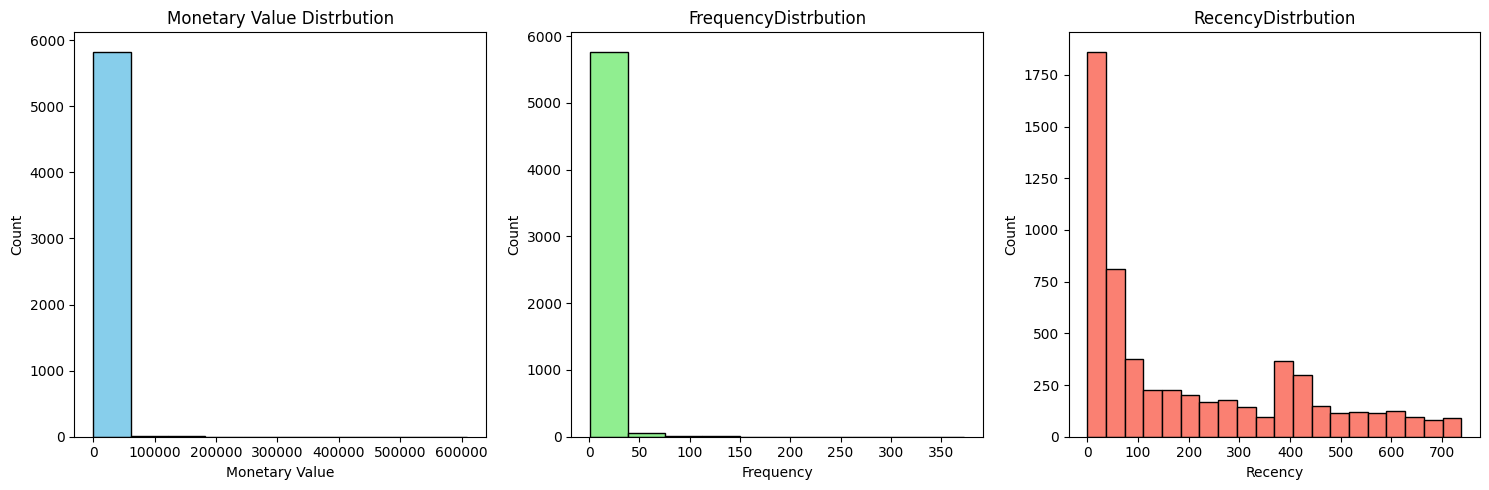

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"],bins=10,color='skyblue',edgecolor='black')
plt.title('Monetary Value Distrbution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"],bins=10,color='lightgreen',edgecolor='black')
plt.title('FrequencyDistrbution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"],bins=20,color='salmon',edgecolor='black')
plt.title('RecencyDistrbution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

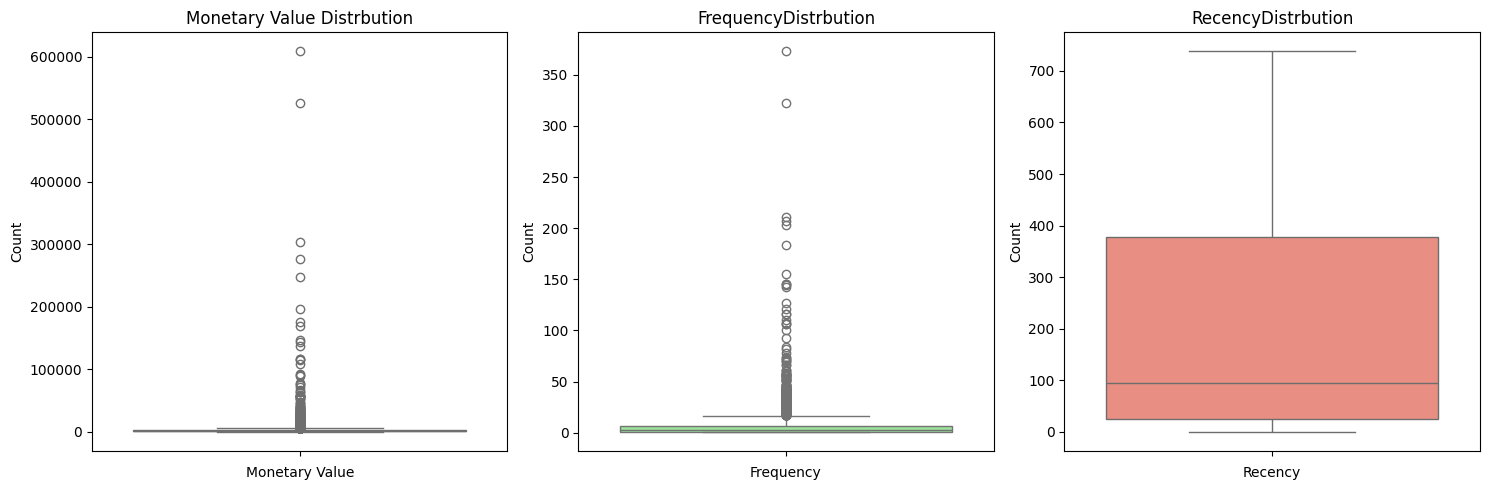

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["MonetaryValue"],color='skyblue')
plt.title('Monetary Value Distrbution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["Frequency"],color='lightgreen')
plt.title('FrequencyDistrbution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df["Recency"],color='salmon')
plt.title('RecencyDistrbution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [29]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

M_IQR = M_Q3-M_Q1


monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"]>(M_Q3+1.5*M_IQR)) | (aggregated_df["MonetaryValue"]<(M_Q1-1.5*M_IQR))].copy()
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,620.00,620.00,620.00,620,620.00
mean,15077.78,18260.64,25.98,2011-10-19 01:33:52.548387072,50.98
min,12346.00,5217.44,1.00,2010-01-17 11:33:00,0.00
25%,13573.00,6591.86,12.00,2011-10-23 01:02:00,4.00
50%,14924.00,9131.81,18.00,2011-11-23 12:34:30,16.00
75%,16607.50,14486.35,29.00,2011-12-05 10:27:30,47.25
max,18260.00,608821.65,373.00,2011-12-09 12:49:00,691.00
std,1754.42,41750.24,31.13,NaN,102.87


In [30]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)

F_IQR = F_Q3-F_Q1


frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"]>(F_Q3+1.5*F_IQR)) | (aggregated_df["Frequency"]<(F_Q1-1.5*F_IQR))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,424.00,424.00,424.00,424,424.00
mean,15373.75,21143.85,34.87,2011-11-08 06:13:43.160377344,30.79
min,12415.00,1820.44,17.00,2010-05-12 16:51:00,0.00
25%,13851.00,6368.09,20.00,2011-11-15 04:14:45,2.75
50%,15306.00,9760.71,25.00,2011-11-30 11:27:30,9.00
75%,16947.25,16691.30,35.00,2011-12-06 12:59:15,24.00
max,18283.00,608821.65,373.00,2011-12-09 12:49:00,575.00
std,1777.62,49369.50,34.68,NaN,70.63


In [31]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index))&(~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,5167.00,5167.00,5167.00,5167,5167.00
mean,15341.72,1133.52,3.69,2011-05-04 02:42:25.140313600,218.90
min,12348.00,2.95,1.00,2009-12-01 10:49:00,0.00
25%,13862.50,311.03,1.00,2010-11-11 13:06:30,32.00
50%,15355.00,717.51,3.00,2011-07-28 14:08:00,133.00
75%,16811.50,1579.13,5.00,2011-11-06 13:22:30,392.00
max,18287.00,5202.97,16.00,2011-12-09 12:50:00,738.00
std,1705.11,1128.97,3.19,NaN,211.12


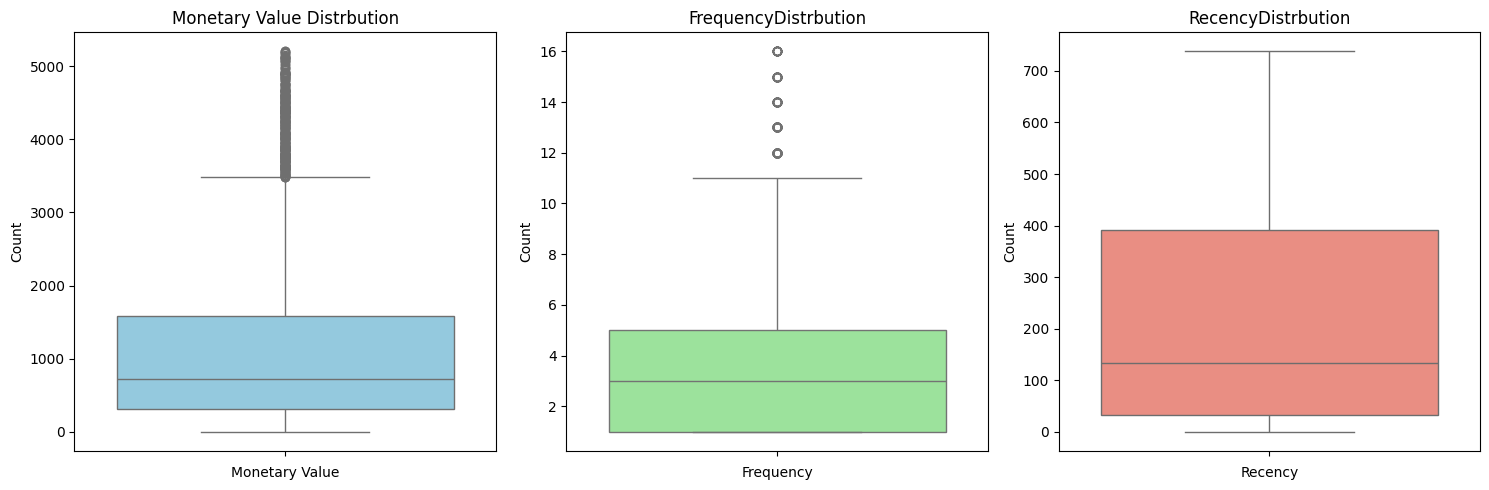

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df["MonetaryValue"],color='skyblue')
plt.title('Monetary Value Distrbution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["Frequency"],color='lightgreen')
plt.title('FrequencyDistrbution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df["Recency"],color='salmon')
plt.title('RecencyDistrbution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

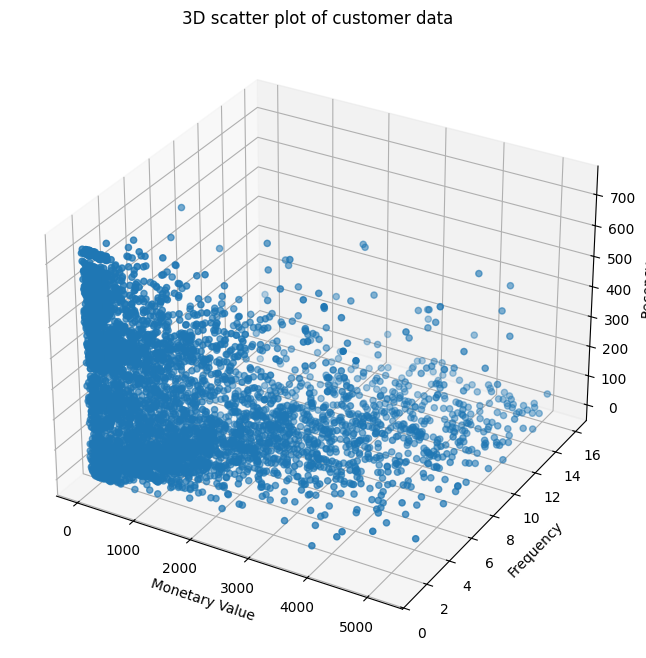

In [33]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"],non_outliers_df["Frequency"],non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter plot of customer data")
plt.show()

In [34]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue","Frequency","Recency"]])

scaled_data

array([[ 0.46495995,  0.41035762, -0.68639195],
       [ 2.25462817, -0.21575129, -0.95167175],
       [-0.74333563, -0.84186021,  0.42683577],
       ...,
       [-0.67016465, -0.84186021,  2.08957165],
       [ 0.10001748, -0.52880575,  1.21793803],
       [ 2.65706856,  1.03646654, -0.8379804 ]])

In [35]:
scaled_data_df = pd.DataFrame(scaled_data,index=non_outliers_df.index,columns=("MonetaryValue","Frequency","Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.46,0.41,-0.69
3,2.25,-0.22,-0.95
4,-0.74,-0.84,0.43
5,-0.74,-0.84,0.73
6,0.53,1.66,-0.87
...,...,...,...
5846,-0.85,-0.53,-1.00
5848,-0.64,-0.84,1.00
5849,-0.67,-0.84,2.09
5850,0.10,-0.53,1.22


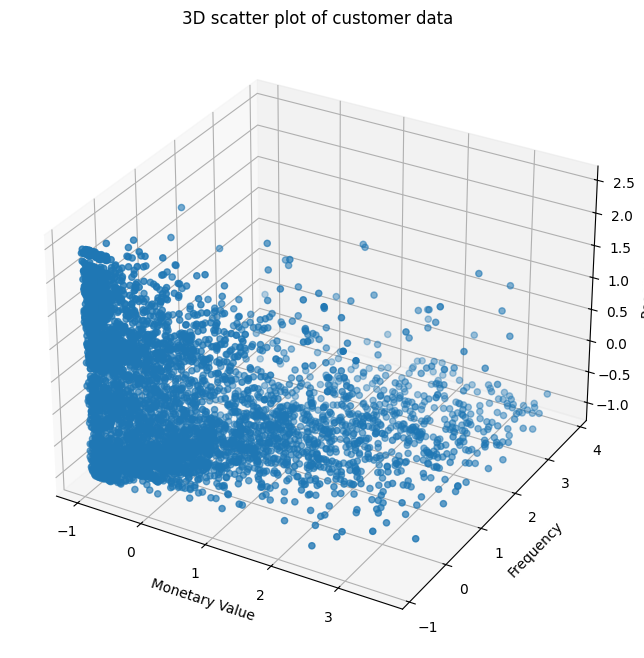

In [36]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"],scaled_data_df["Frequency"],scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter plot of customer data")
plt.show()

# K means Clustering


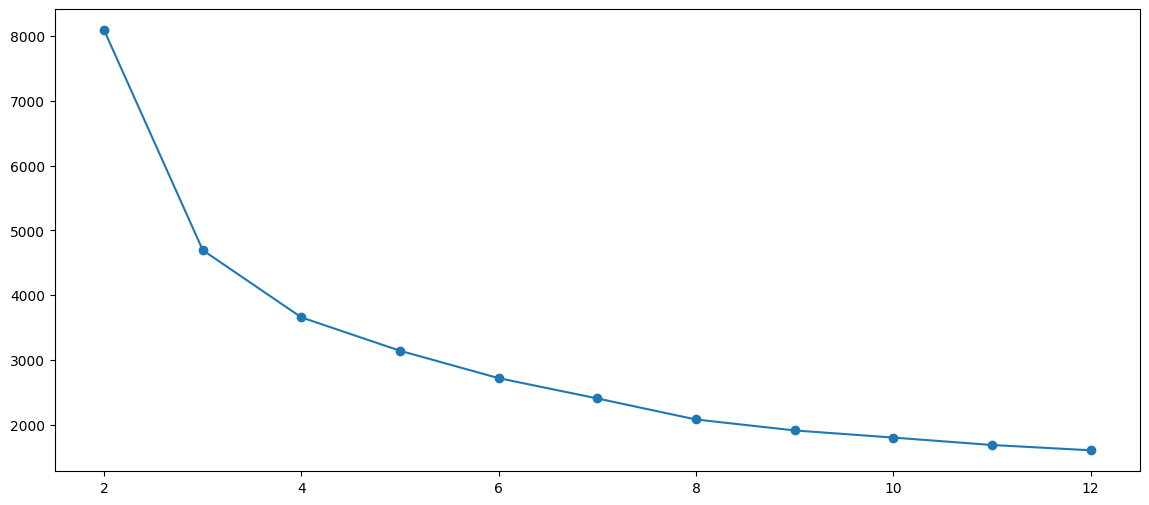

In [37]:
max_k=12
inertia = []
k_values = range(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)

    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.plot(k_values,inertia,marker='o')


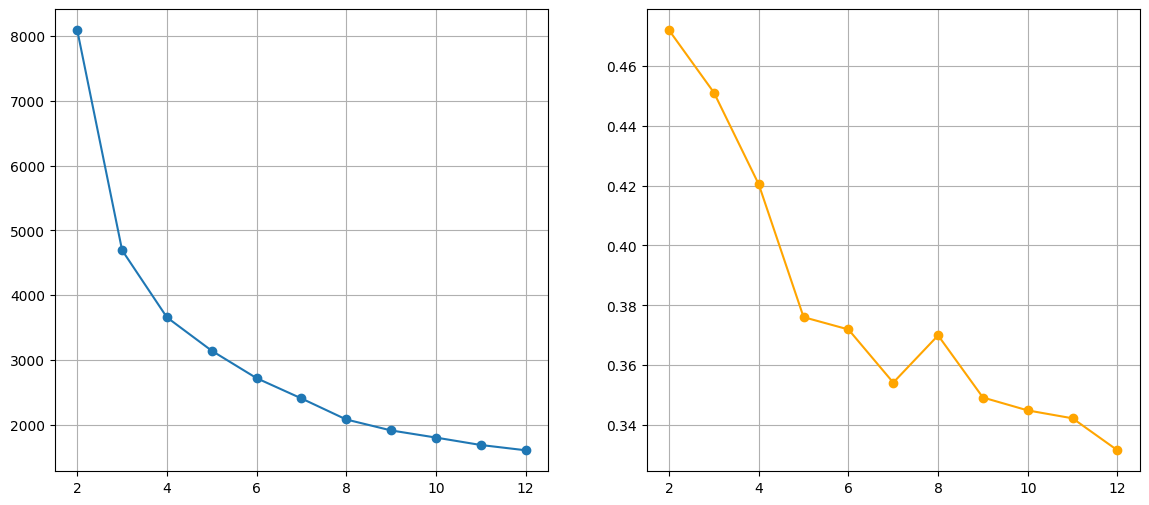

In [38]:
max_k=12
inertia = []
silhouette_scores=[]
k_values = range(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)

    
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values,silhouette_scores,marker = 'o',color='orange')
plt.grid(True)

In [39]:
kmeans = KMeans(n_clusters=4,random_state=42,max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([2, 2, 1, ..., 1, 1, 0], dtype=int32)

In [40]:
non_outliers_df["Cluster"] = cluster_labels

/tmp/ipykernel_2860/716382161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


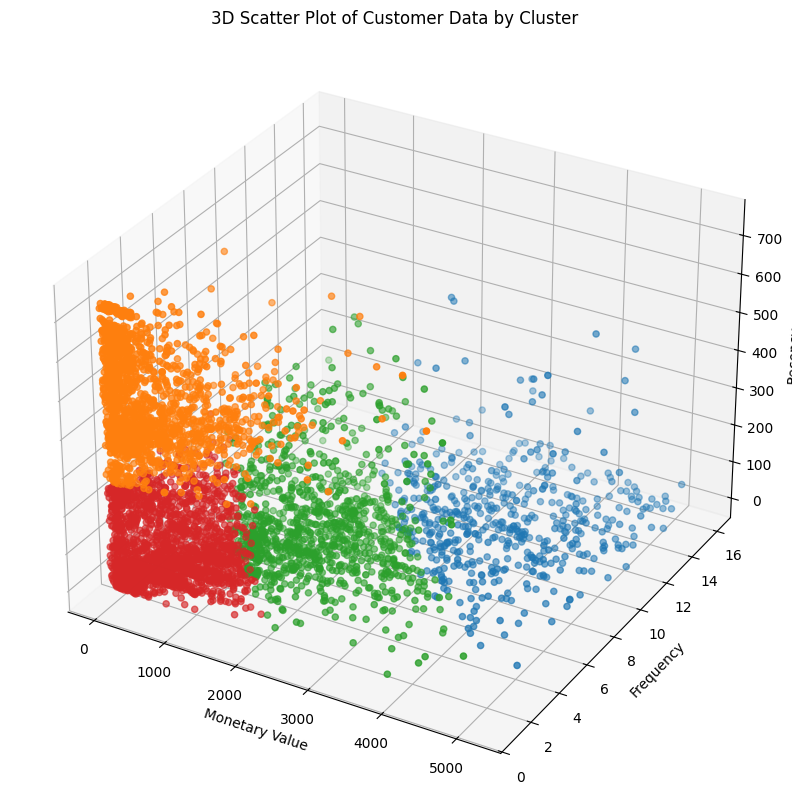

In [41]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

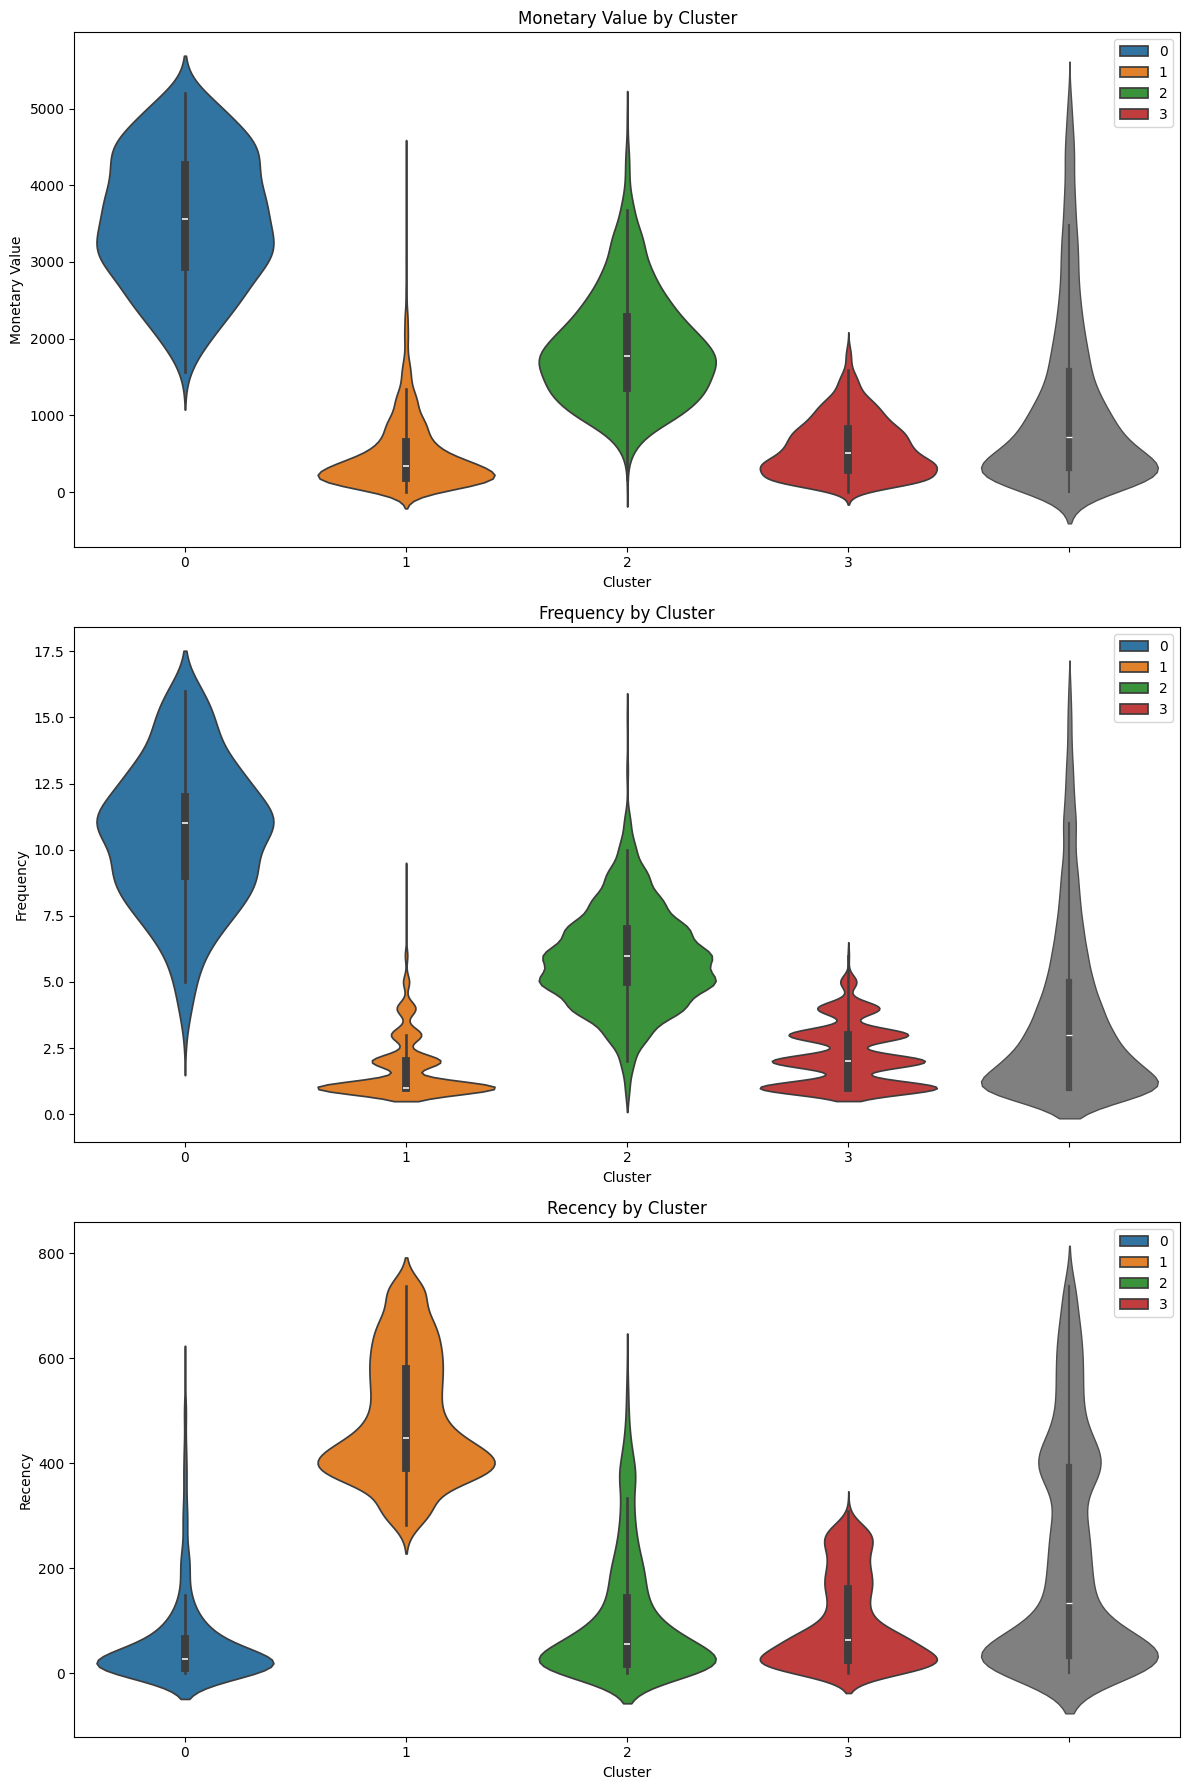

In [42]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

In [43]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77352.96,3,2011-01-18 10:01:00,325,-1
1,12347.00,5633.32,8,2011-12-07 15:52:00,1,-1
10,12356.00,5613.68,6,2011-11-17 08:40:00,22,-1
11,12357.00,17437.66,2,2011-11-06 16:07:00,32,-1
13,12359.00,8935.94,10,2011-10-13 12:47:00,57,-1
...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3


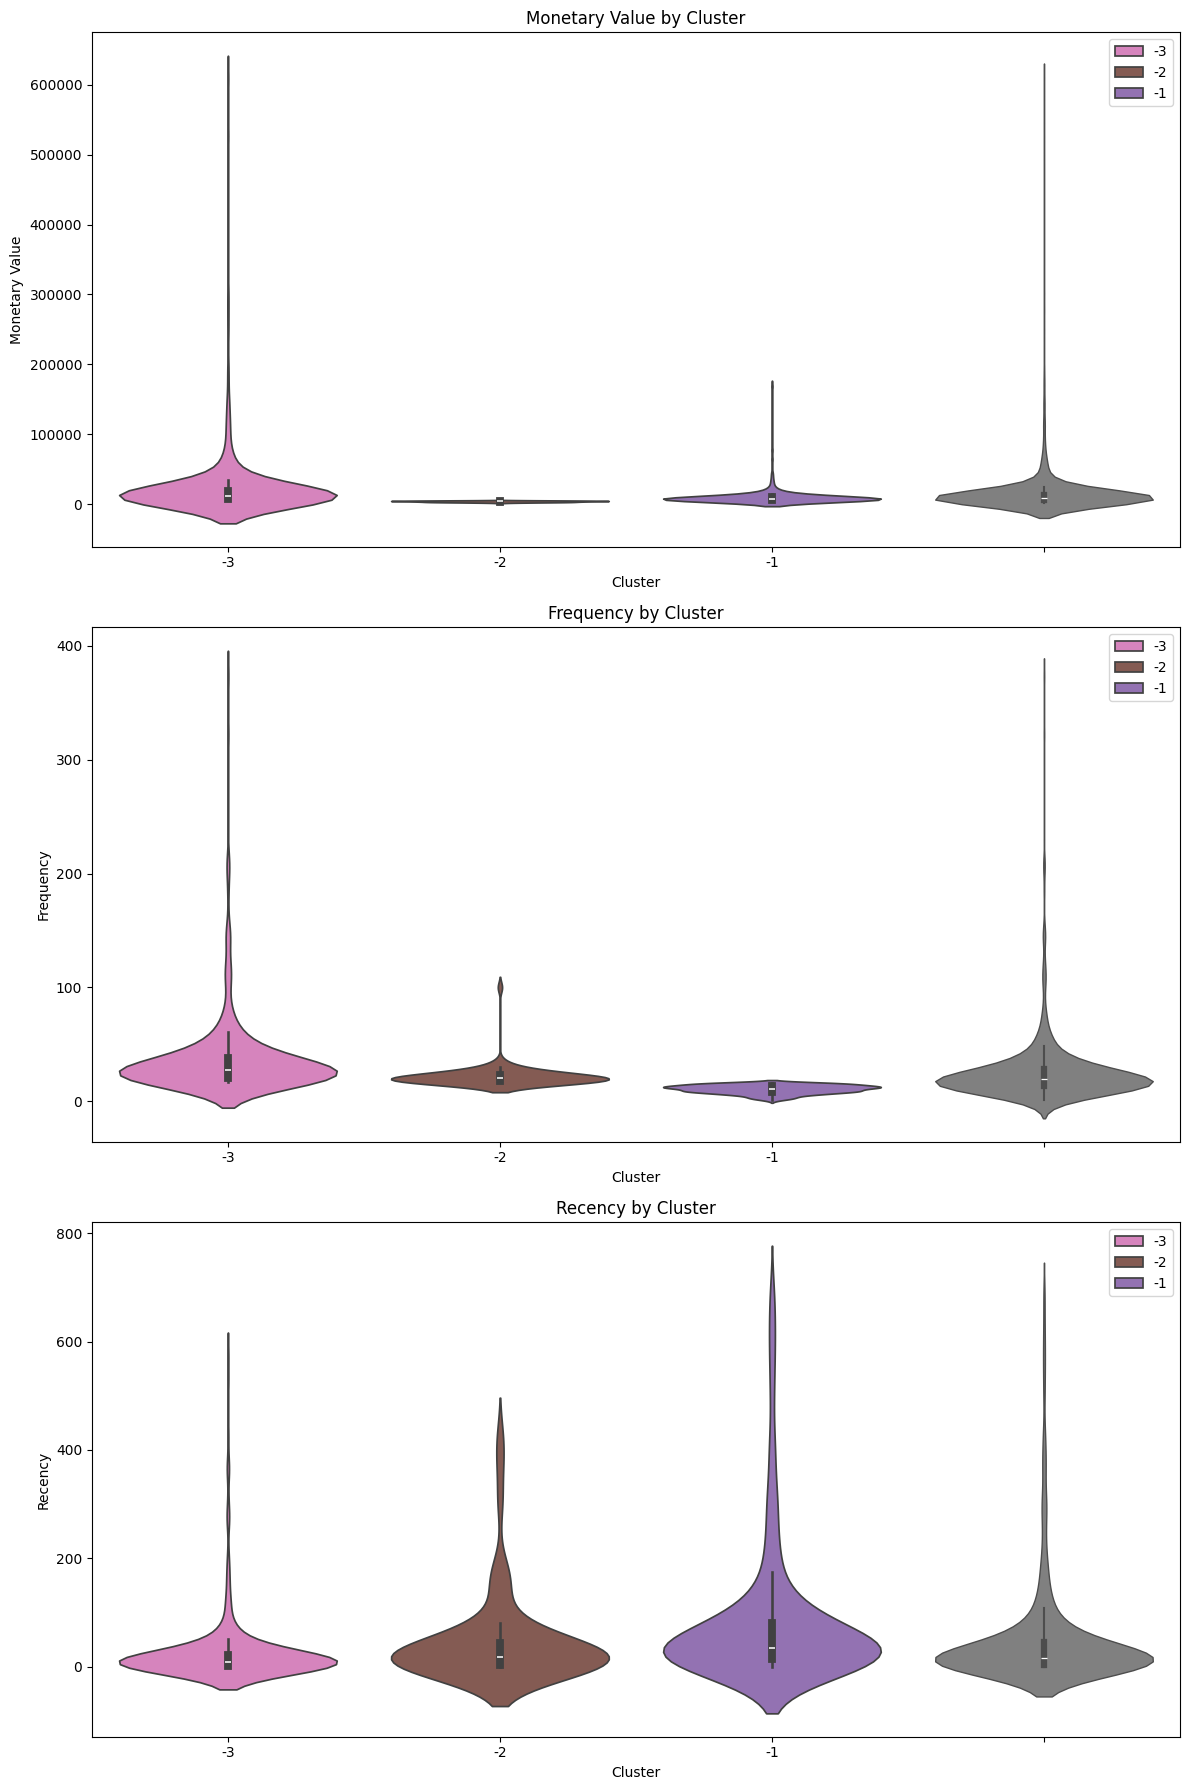

In [44]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

In [45]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [46]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2
...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3


In [47]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2,NURTURE
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2,NURTURE
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1,RE-ENGAGE
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1,RE-ENGAGE
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2,NURTURE
...,...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3,DELIGHT
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3,DELIGHT
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3,DELIGHT
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3,DELIGHT


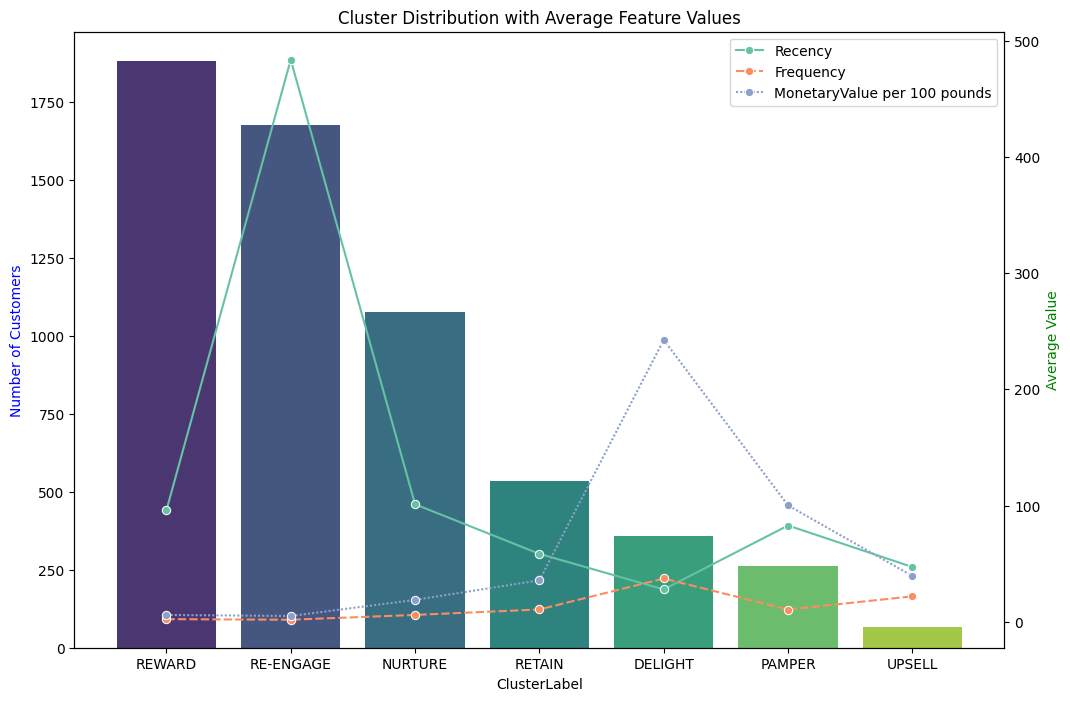

In [49]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()